In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# 등고선 처리
#https://www.vworld.kr/dtmk/dtmk_ntads_s002.do?dsId=30185 국토지리원 파일 다운로드하여 GIS로 처리
# id별 좌표값을 찾아 shp파일 내의 해발 고도로 기울기, upper, lower 처리
# QGIS에 파이썬 모듈에서 처리
import geopandas as gpd
import pandas as pd
# Shapefile 읽기
shp_file_path = '수원 등고선_process.shp'  # 수원으로 한정, id에 매칭
gdf = gpd.read_file(shp_file_path)

# Shapefile 주요 데이터 확인
print(gdf.head())  # 열 구조 확인
# 주요 속성만 추출 (예: id, 시작/끝 좌표, 고도 등)
gdf['start_lat'] = gdf.geometry.apply(lambda geom: geom.coords[0][1])
gdf['start_long'] = gdf.geometry.apply(lambda geom: geom.coords[0][0])
gdf['end_lat'] = gdf.geometry.apply(lambda geom: geom.coords[-1][1])
gdf['end_long'] = gdf.geometry.apply(lambda geom: geom.coords[-1][0])

# CSV로 저장
csv_file_path = 'processed_data.csv'
gdf[['id', 'start_lat', 'start_long', 'end_lat', 'end_long', 'elevation_start', 'elevation_end']].to_csv(csv_file_path, index=False)


In [ ]:
# 엑셀 파일 읽기
file_path = "preprocessed.xlsx"
data = pd.read_excel(file_path)

In [ ]:
# 기울기 계산 (위도 차이 / 경도 차이)
data['slope'] = (data['id_end_lat'] - data['id_start_lat']) / (data['id_end_long'] - data['id_start_long'])

# 방향 추가
data['direction'] = data['slope'].apply(lambda x: 'upper' if x > 0 else 'lower')

# 기울기 절댓값 추가
data['slope_abs'] = data['slope'].abs()

# 추가로 해발 고도의 변화 계산
data['elevation_diff'] = data['elevation_end'] - data['elevation_start']


In [ ]:
# 엑셀 및 CSV로 저장
excel_output_path = "preprocessed_with_slope.xlsx"
csv_output_path = "preprocessed_with_slope.csv"

data.to_excel(excel_output_path, index=False)
data.to_csv(csv_output_path, index=False)

print(f"Data with slopes saved to {excel_output_path} and {csv_output_path}.")

Data with slopes saved to preprocessed_with_slope.xlsx and preprocessed_with_slope.csv.


In [6]:
data

,id_start,id_end,id_start_lat,id_start_long,id_end_lat,id_end_long,edges_distance,slope,direction,slope_abs
0,755,1,37.24738,127.07600,37.24781,127.07594,68.4,-7.166667,ower,7.166667
1,479,2,37.24734,127.07548,37.24779,127.07555,51.4,6.428571,upper,6.428571
2,479,755,37.24734,127.07548,37.24738,127.07600,22.4,0.076923,upper,0.076923
3,1,2,37.24781,127.07594,37.24779,127.07555,36.6,0.051282,upper,0.051282
4,3,1,37.24812,127.07592,37.24781,127.07594,41.2,-15.500000,ower,15.500000
...,...,...,...,...,...,...,...,...,...,...
1242,496,497,37.24426,127.07423,37.24346,127.07416,150.2,11.428571,upper,11.428571
1243,569,570,37.24573,127.06932,37.24558,127.06924,2.7,1.875000,upper,1.875000
1244,535,540,37.23470,127.06930,37.23452,127.06936,6.5,-3.000000,ower,3.000000
1245,504,612,37.24181,127.07084,37.24164,127.07071,28.9,1.307692,upper,1.307692


In [ ]:
# 데이터 확인 및 전처리
# data[['slope', 'slope_abs']] 열에 NaN이나 inf 값이 있는지 확인

data[['slope', 'slope_abs']] = data[['slope', 'slope_abs']].replace([float('inf'), float('-inf')], None)
data.dropna(subset=['slope', 'slope_abs'], inplace=True)

In [10]:
# StandardScaler 적용
scaler = StandardScaler()
data[['slope_scaled', 'slope_abs_scaled']] = scaler.fit_transform(data[['slope', 'slope_abs']])

# 시각화
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

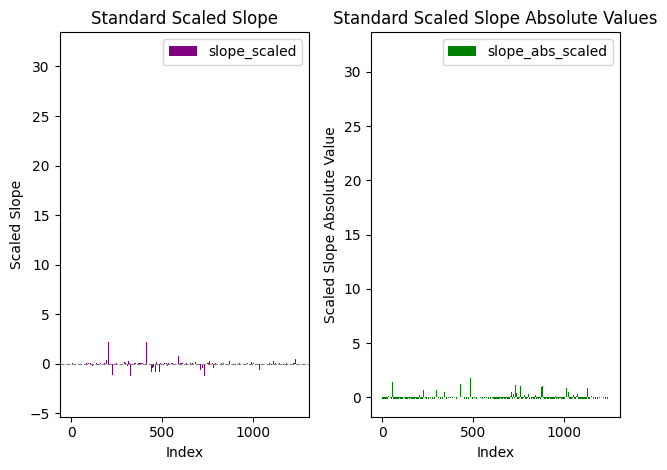

In [11]:
# 스케일링된 slope 시각화
plt.subplot(1, 2, 1)
plt.bar(data.index, data['slope_scaled'], color='purple', label='slope_scaled')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Standard Scaled Slope")
plt.xlabel("Index")
plt.ylabel("Scaled Slope")
plt.legend()

# 스케일링된 slope_abs 시각화
plt.subplot(1, 2, 2)
plt.bar(data.index, data['slope_abs_scaled'], color='green', label='slope_abs_scaled')
plt.title("Standard Scaled Slope Absolute Values")
plt.xlabel("Index")
plt.ylabel("Scaled Slope Absolute Value")
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# 결과 출력
print(data[['slope', 'slope_abs', 'slope_scaled', 'slope_abs_scaled']])

          slope  slope_abs  slope_scaled  slope_abs_scaled
0     -7.166667   7.166667     -0.495879          0.305047
1      6.428571   6.428571      0.413320          0.254882
2      0.076923   0.076923     -0.011455         -0.176815
3      0.051282   0.051282     -0.013170         -0.178557
4         -15.5       15.5     -1.053182          0.871431
...         ...        ...           ...               ...
1242  11.428571  11.428571      0.747701          0.594712
1243      1.875      1.875      0.108794         -0.054607
1244       -3.0        3.0     -0.217228          0.021855
1245   1.307692   1.307692      0.070855         -0.093164
1246   0.181818   0.181818     -0.004440         -0.169685

[1224 rows x 4 columns]


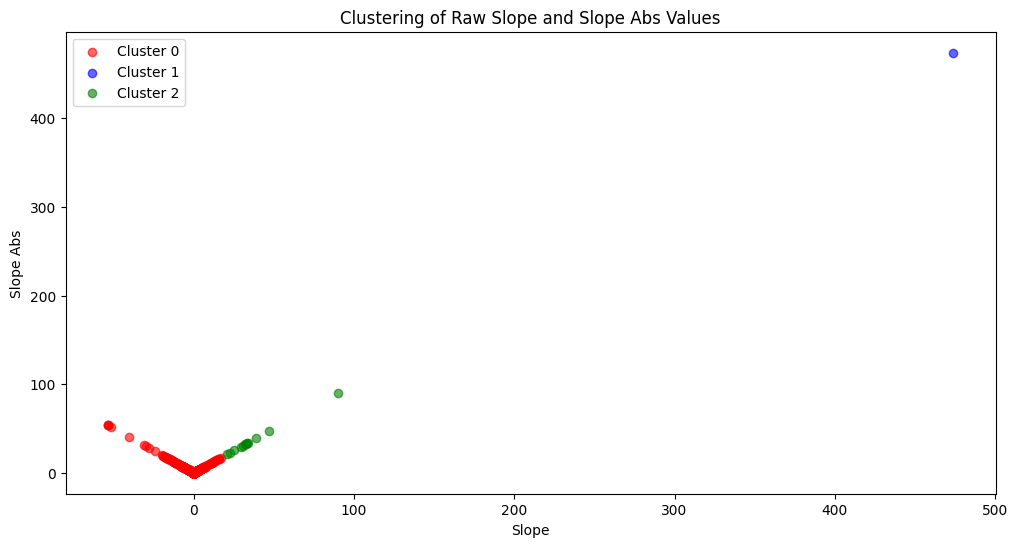

      slope slope_abs  cluster_raw
297   474.0     474.0            1
58     90.0      90.0            2
493   -53.5      53.5            0
489   -53.5      53.5            0
225   -53.5      53.5            0
...     ...       ...          ...
1019    0.0       0.0            0
1136    0.0       0.0            0
780     0.0       0.0            0
1134    0.0       0.0            0
501     0.0       0.0            0

[1224 rows x 3 columns]


In [ ]:
# 1. KMeans 클러스터링 (스케일링 없이)
X_raw = data[['slope', 'slope_abs']]
kmeans_raw = KMeans(n_clusters=3, random_state=42)
data['cluster_raw'] = kmeans_raw.fit_predict(X_raw)

# 2. slope_abs 기준 정렬 (클러스터 포함)
data_sorted_raw = data.sort_values(by='slope_abs', ascending=False)

# 3. 클러스터별 시각화 (스케일링하지 않은 데이터)
plt.figure(figsize=(12, 6))

# 클러스터 색상 정의
colors = ['red', 'blue', 'green']

# 클러스터별로 점 산포도 시각화
for cluster in range(3):
    cluster_data = data[data['cluster_raw'] == cluster]
    plt.scatter(cluster_data['slope'], cluster_data['slope_abs'],
                color=colors[cluster], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Clustering of Raw Slope and Slope Abs Values')
plt.xlabel('Slope')
plt.ylabel('Slope Abs')
plt.legend()
plt.show()

# 4. 정렬된 데이터 출력
print(data_sorted_raw[['slope', 'slope_abs', 'cluster_raw']])


Cluster Counts:
cluster_raw
0    1211
1       1
2      12
Name: count, dtype: int64
Results saved as:
XLSX: cluster_results.xlsx
CSV: cluster_results.csv


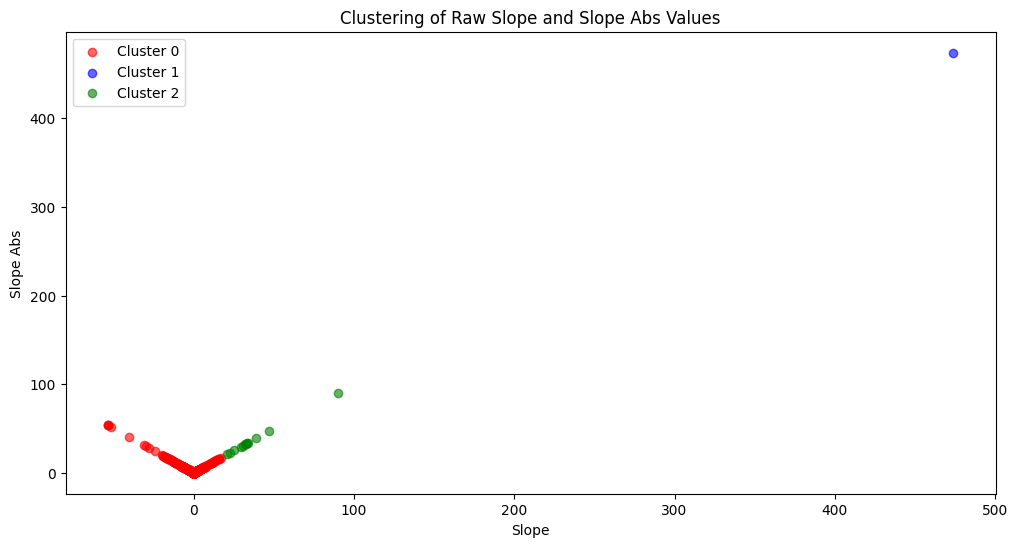

In [ ]:
# 1. KMeans 클러스터링 (원본 데이터 사용)
X_raw = data[['slope', 'slope_abs']]
kmeans_raw = KMeans(n_clusters=3, random_state=42)
data['cluster_raw'] = kmeans_raw.fit_predict(X_raw)

# 2. 클러스터별 데이터 갯수 출력
cluster_counts = data['cluster_raw'].value_counts().sort_index()
print("Cluster Counts:")
print(cluster_counts)

# 3. slope_abs 기준 정렬
data_sorted_raw = data.sort_values(by='slope_abs', ascending=False)

# 4. 모든 컬럼 포함한 데이터를 저장 (xlsx, csv)
output_path_xlsx = 'cluster_results.xlsx'
output_path_csv = 'cluster_results.csv'

data_sorted_raw.to_excel(output_path_xlsx, index=False)  # xlsx 저장
data_sorted_raw.to_csv(output_path_csv, index=False)    # csv 저장

print(f"Results saved as:\nXLSX: {output_path_xlsx}\nCSV: {output_path_csv}")

# 5. 시각화 (원본 데이터 기준 클러스터링 결과)
plt.figure(figsize=(12, 6))

# 클러스터 색상 정의
colors = ['red', 'blue', 'green']

# 클러스터별로 점 산포도 시각화
for cluster in range(3):
    cluster_data = data[data['cluster_raw'] == cluster]
    plt.scatter(cluster_data['slope'], cluster_data['slope_abs'],
                color=colors[cluster], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Clustering of Raw Slope and Slope Abs Values')
plt.xlabel('Slope')
plt.ylabel('Slope Abs')
plt.legend()
plt.show()